# Calculating Fibonacci Retracements
### Setting import requirements and loading data from Binance API

In [1]:
import os 
from dotenv import load_dotenv
import requests
from binance import Client

import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Loading API keys from .env file

load_dotenv()
BINANCE_API_KEY=os.getenv('BINANCE_API_KEY')
BINANCE_SECRET_KEY=os.getenv('BINANCE_SECRET_KEY')
client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY, tld='us')

In [3]:
# Defining ticker for Solanas USD

trades = client.get_historical_trades(symbol='SOLUSD')

klines = client.get_historical_klines("SOLUSD", Client.KLINE_INTERVAL_1DAY, "30 Apr, 2020", "30 Apr, 2022")

In [4]:
# Creating dataframe, setting columns, and 
klines_df = pd.DataFrame(klines) 
klines_df.columns = ['open time', 'open', 'high', 'low', 'close', 'volume', 'close time', 'quote asset volume', 'number of trades', 'taker buy base asset volume', 'taker buy quote asset volume', 'NaN']
klines_df.drop(columns='NaN', inplace=True)

In [5]:
klines_df['open time'] = pd.to_datetime(klines_df['open time'], unit='ms')
klines_df['close time'] = pd.to_datetime(klines_df['close time'], unit='ms')
klines_df.head()

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
0,2020-09-18,3.0888,3.2926,2.8050,3.1002,41039.60000000,2020-09-18 23:59:59.999,124683.8036,714,26548.92000000,81833.3694
1,2020-09-19,3.1002,3.2616,2.9846,3.0076,19297.28000000,2020-09-19 23:59:59.999,59744.3755,686,7902.23000000,24579.4758
2,2020-09-20,3.0042,3.0042,2.7550,2.8737,21274.03000000,2020-09-20 23:59:59.999,60928.1154,387,7266.20000000,20715.0029
3,2020-09-21,2.9110,3.0337,2.5500,2.7795,19867.49000000,2020-09-21 23:59:59.999,55417.0202,345,10019.54000000,28579.9558
4,2020-09-22,2.7378,3.0089,2.6593,2.9629,58835.67000000,2020-09-22 23:59:59.999,168942.4414,435,12448.52000000,35901.7861


## Finding the factors

In [6]:
klines_df_corr = klines_df.drop(columns=['open time','close time'])
klines_df_corr

,open,high,low,close,volume,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
0,3.0888,3.2926,2.8050,3.1002,41039.60000000,124683.8036,714,26548.92000000,81833.3694
1,3.1002,3.2616,2.9846,3.0076,19297.28000000,59744.3755,686,7902.23000000,24579.4758
2,3.0042,3.0042,2.7550,2.8737,21274.03000000,60928.1154,387,7266.20000000,20715.0029
3,2.9110,3.0337,2.5500,2.7795,19867.49000000,55417.0202,345,10019.54000000,28579.9558
4,2.7378,3.0089,2.6593,2.9629,58835.67000000,168942.4414,435,12448.52000000,35901.7861
...,...,...,...,...,...,...,...,...,...
585,100.9758,102.0976,94.6210,95.7159,74880.17000000,7365647.2794,21625,38473.68000000,3785026.9001
586,95.7381,100.7525,94.9235,98.3570,65655.07000000,6438104.7141,21021,33831.09000000,3317102.8450
587,98.3136,100.5527,96.3708,98.2014,68097.56000000,6712283.8881,19725,33666.71000000,3319913.7655
588,98.2356,98.7000,92.3313,93.9566,73629.15000000,7004742.3399,17715,37734.88000000,3589963.9147


In [7]:
# conver objects and integers to floats
klines_df_corr['open'] = klines_df_corr['open'].astype('float')
klines_df_corr['high'] = klines_df_corr['high'].astype('float')
klines_df_corr['low'] = klines_df_corr['low'].astype('float')
klines_df_corr['close'] = klines_df_corr['close'].astype('float')
klines_df_corr['volume'] = klines_df_corr['volume'].astype('float')
klines_df_corr['quote asset volume'] = klines_df_corr['quote asset volume'].astype('float')
klines_df_corr['taker buy base asset volume'] = klines_df_corr['taker buy base asset volume'].astype('float')
klines_df_corr['taker buy quote asset volume'] = klines_df_corr['taker buy quote asset volume'].astype('float')

klines_df_corr.dtypes

open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
quote asset volume              float64
number of trades                  int64
taker buy base asset volume     float64
taker buy quote asset volume    float64
dtype: object

In [8]:
klines_df_corr.corr()

,open,high,low,close,volume,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
open,1.000000,0.998216,0.997765,0.996590,0.096146,0.522506,0.650372,0.104248,0.527142
high,0.998216,1.000000,0.997150,0.998700,0.123034,0.550223,0.675354,0.132332,0.555942
low,0.997765,0.997150,1.000000,0.997670,0.078850,0.502918,0.628542,0.088133,0.508790
close,0.996590,0.998700,0.997670,1.000000,0.108117,0.534894,0.660060,0.118360,0.541656
volume,0.096146,0.123034,0.078850,0.108117,1.000000,0.751086,0.662488,0.997132,0.744959
quote asset volume,0.522506,0.550223,0.502918,0.534894,0.751086,1.000000,0.960847,0.756013,0.999106
number of trades,0.650372,0.675354,0.628542,0.660060,0.662488,0.960847,1.000000,0.669530,0.961958
taker buy base asset volume,0.104248,0.132332,0.088133,0.118360,0.997132,0.756013,0.669530,1.000000,0.752021
taker buy quote asset volume,0.527142,0.555942,0.508790,0.541656,0.744959,0.999106,0.961958,0.752021,1.000000


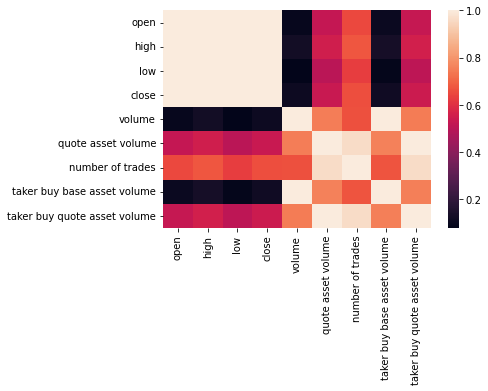

In [9]:
sns.heatmap(klines_df_corr.corr());

## Fibonacci Retracements
Common methods for finding the high and lows in Fibonacci Retracement methods calls for analysis for the entire dataframe and for the entire period of the dataset. This proves to be not useful in identifying the various upswings in the entire period of the dataset. 

The method we propose is to identify the daily returns which will identify the direction of the momentum. In conjunction with rolling returns for different windows, we can validate the swings. 

In [ ]:
# Calculate the daily returns 
# Calculate the rolling daily returns for 2,3,5,8,and 13 days

In [10]:
# Initializing variables
high_swing = -1
low_swing = -1

In [11]:
# Defining conditions for identifying the high_swing index
for i in range(1, klines_df.shape[0]-1):
  if klines_df['high'][i] > klines_df['high'][i-1] and klines_df['high'][i] > klines_df['high'][i+1] and (high_swing == -1 or klines_df['high'][i] > klines_df['high'][high_swing]):
    high_swing = i
  if klines_df['low'][i] < klines_df['low'][i-1] and klines_df['low'][i] < klines_df['low'][i+1] and (low_swing == -1 or klines_df['low'][i] < klines_df['low'][low_swing]):
    low_swing = i